In [128]:
# from getopt import getopt
# import cloudpickle
# import pickle
# import sys
# import os
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy.special import logit, expit
from scipy.stats import uniform, norm, bernoulli, pearsonr
# from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
# import pymc as pm
# import arviz as az
# from modeltools import mcmc_diagnostics, create_summary_stat
# from downcast import downcast_df
# import jax
# from pymc.sampling_jax import sample_numpyro_nuts
# from time import time, sleep
# from datetime import timedelta

In [129]:
def jitter(arr, scale="linear"):
    if scale=="log":
        return arr+uniform.rvs(-1e-4,1e-4,len(arr))
    elif scale=="linear":
        return arr+uniform.rvs(-1/2,1,len(arr))

In [130]:
p_diff_df = pd.read_csv("data/simulations/sig_p_diff.csv")
p_diffOA_df = pd.read_csv("data/simulations/sigOA_p_diff.csv")
raters_df = pd.read_csv("data/simulations/sig_n_raters.csv")
ratersOA_df = pd.read_csv("data/simulations/sigOA_n_raters.csv")
# p_raters_df =  pd.read_csv("data/simulations/sig_p_n_raters.csv")
# scores_df = pd.read_csv("data/simulations/sig_scores_per_r.csv")
# p_scores_df =  pd.read_csv("data/simulations/sig_p_scores_per_r.csv")

# Adding minimum val to bht_pval for log plots
# dfs = [p_diff_df, p_diffOA_df, raters_df, ratersOA_df]
# for df in dfs:
#     df.loc[:,"bht_pval"]+=1e-4
#     df.loc[:,"propz_pval"]+=1e-4

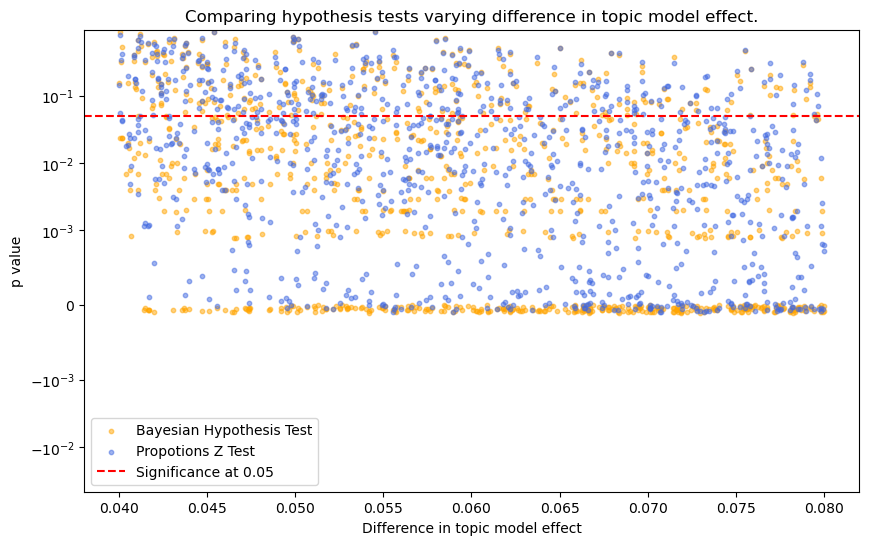

In [131]:
sim_results = p_diff_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(sim_results["p_diff"], jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparing hypothesis tests varying difference in topic model effect.")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Difference in topic model effect")
ax.set_ylabel("p value")
ax.legend()
plt.show()

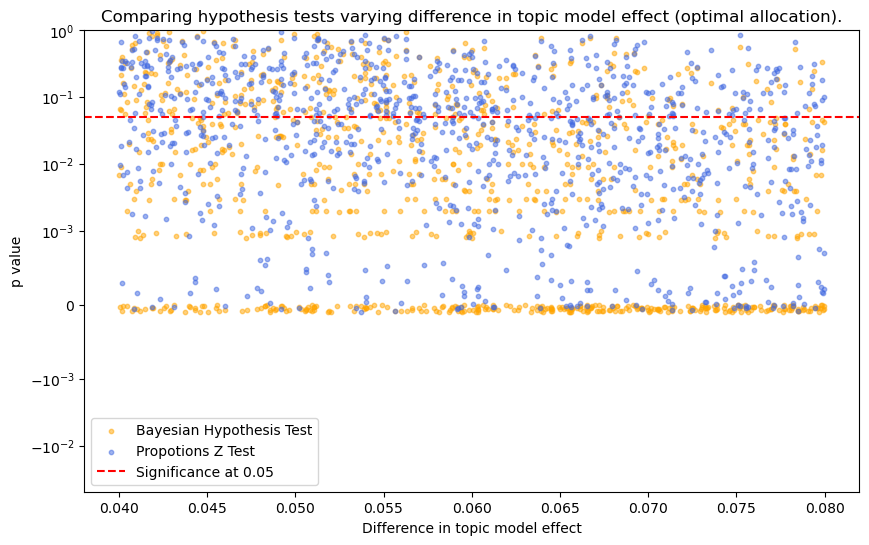

In [132]:
sim_results = p_diffOA_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(sim_results["p_diff"], jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparing hypothesis tests varying difference in topic model effect (optimal allocation).")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Difference in topic model effect")
ax.set_ylabel("p value")
ax.legend()
plt.show()

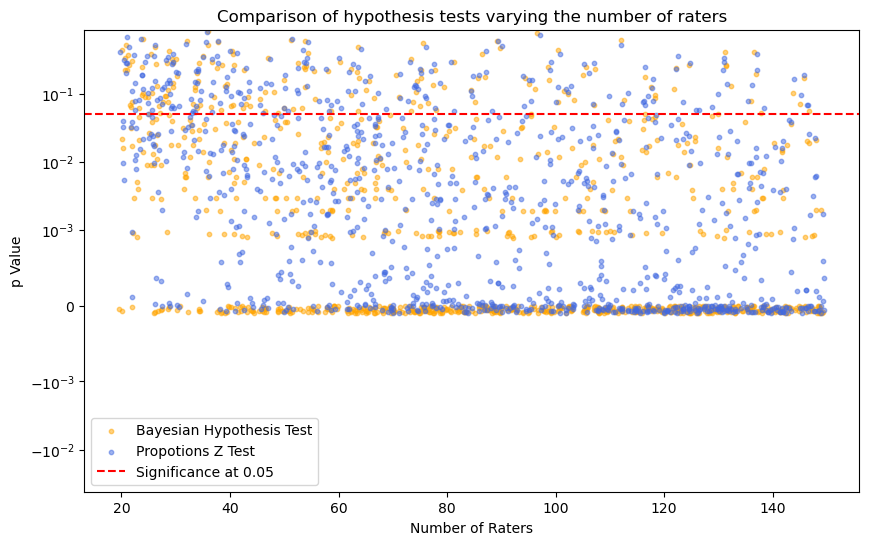

In [133]:
sim_results = raters_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(sim_results["n_raters"]), jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

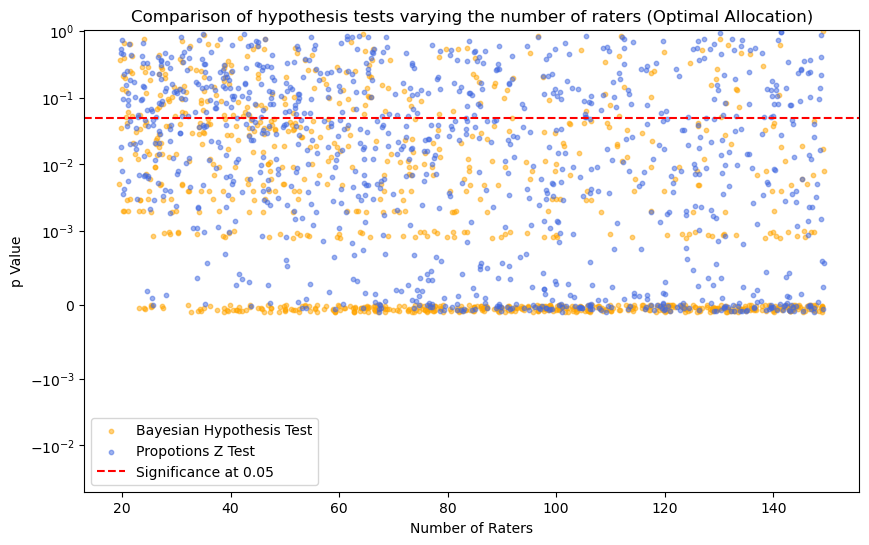

In [134]:
sim_results = ratersOA_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(sim_results["n_raters"]), jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters (Optimal Allocation)")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

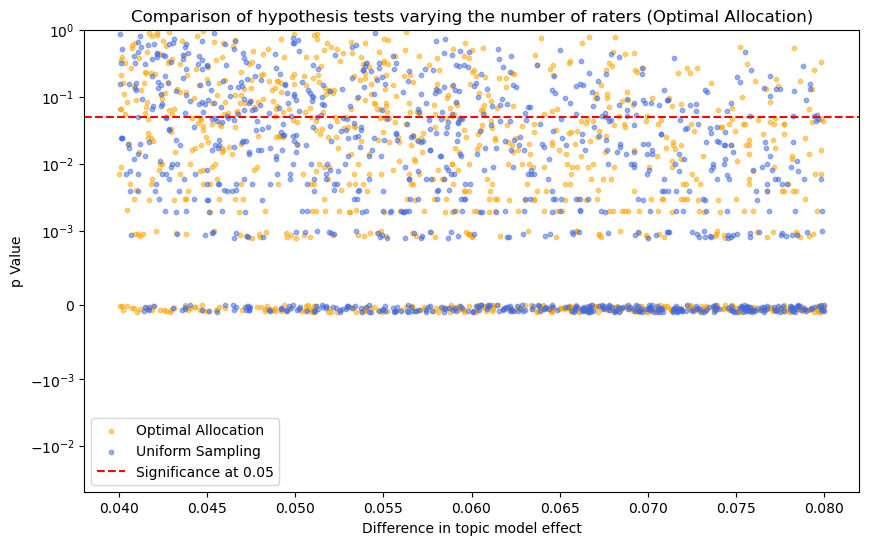

In [135]:
# Uniform sampling vs OA
N = len(sim_results)
results = {"royalblue":p_diff_df, "orange":p_diffOA_df}
legend = {"royalblue":"Uniform Sampling", "orange":"Optimal Allocation"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(results[colour]["p_diff"], jitter(results[colour]["bht_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters (Optimal Allocation)")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Difference in topic model effect")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

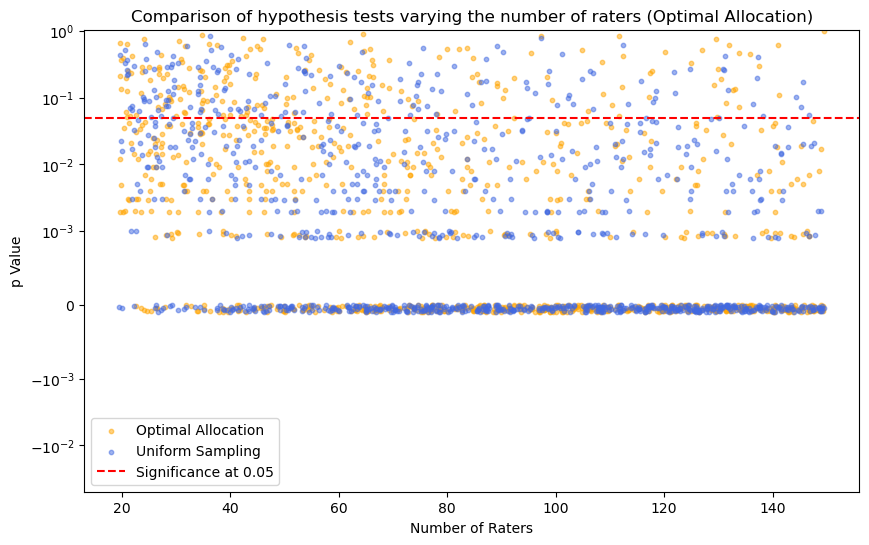

In [136]:
# Uniform sampling vs OA
N = len(sim_results)
results = {"royalblue":raters_df, "orange":ratersOA_df}
legend = {"royalblue":"Uniform Sampling", "orange":"Optimal Allocation"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(results[colour]["n_raters"]), jitter(results[colour]["bht_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters (Optimal Allocation)")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

In [137]:
# Calculating correlation coefficient
r = pearsonr(raters_df["propz_pval"]-1e-4, raters_df["bht_pval"]-1e-4)[0]
print(f"The correlation between p values of the two significance tests is {r}")

bht_smaller = (raters_df["bht_pval"] < raters_df["propz_pval"])
print(f"The proportion of tests with smaller bht pval is {bht_smaller.sum()/bht_smaller.count()}")
      

The correlation between p values of the two significance tests is 0.981807917119387
The proportion of tests with smaller bht pval is 0.928


In [138]:
bht_0 = (raters_df['bht_pval']==1e-4)
print(f"The proportion of bht_pval that is 0 is {bht_0.sum()/bht_0.count()}")

The proportion of bht_pval that is 0 is 0.0


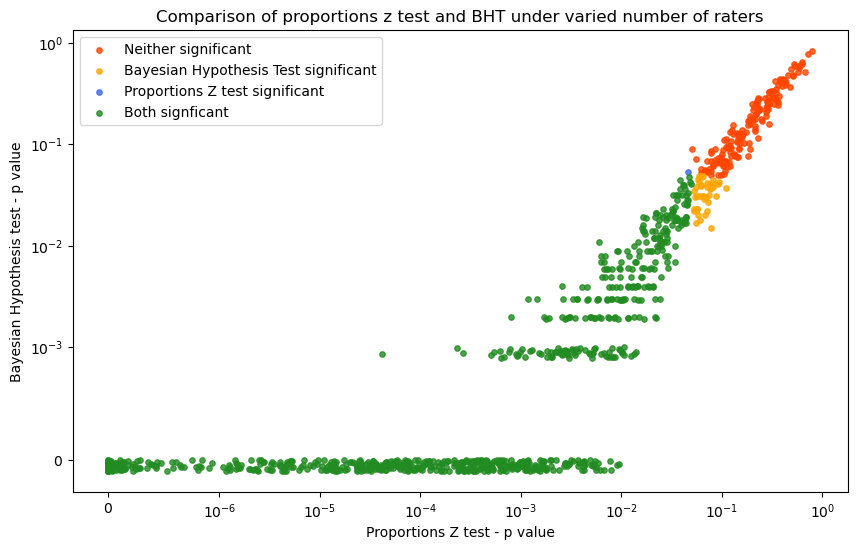

In [149]:
# Comparing prop z test and bh test under different number of raters
sim_results=raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "orange", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], jitter(df["bht_pval"],scale="log"), c=colour, label=legend[colour], s=15, alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT under varied number of raters")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xscale("symlog", linthresh=1e-6)
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()

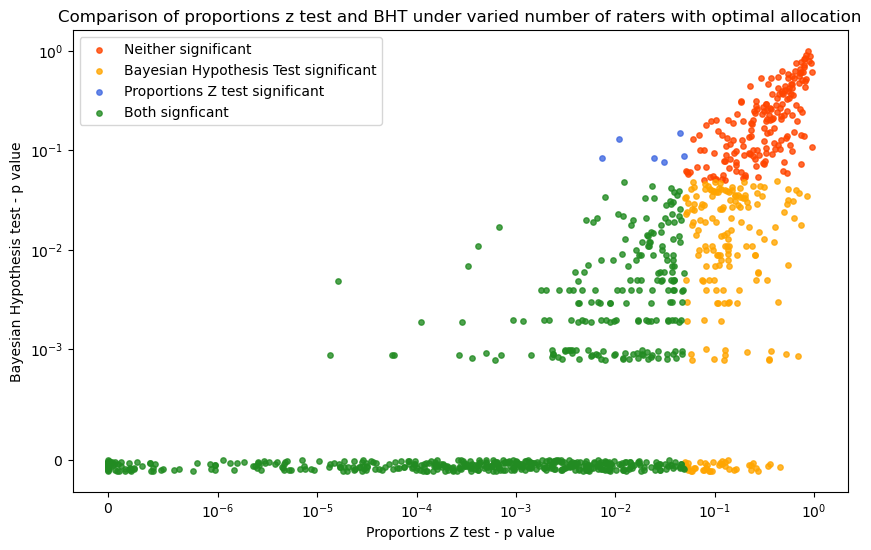

In [150]:
# Comparing prop z test and bh test under different number of raters
sim_results=ratersOA_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "orange", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], jitter(df["bht_pval"],scale="log"), c=colour, label=legend[colour], s=15, alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT under varied number of raters with optimal allocation")
ax.set_yscale("symlog", linthresh=1e-3)
ax.set_xscale("symlog", linthresh=1e-6)
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()

## Investigations

In [14]:
# Finding simulations with maximal differences between bht_pval and propz_pval
p_raters_df["pval_ratio"]=p_raters_df["bht_pval"]/p_raters_df["propz_pval"]
p_raters_df[p_raters_df["pval_ratio"]>0].sort_values("pval_ratio")

NameError: name 'p_raters_df' is not defined

In [ ]:
d = p_raters_df[p_raters_df["pval_ratio"]>0]
print("proportion of simulations with lower propz_pval", (d["pval_ratio"]>1).sum()/len(d))

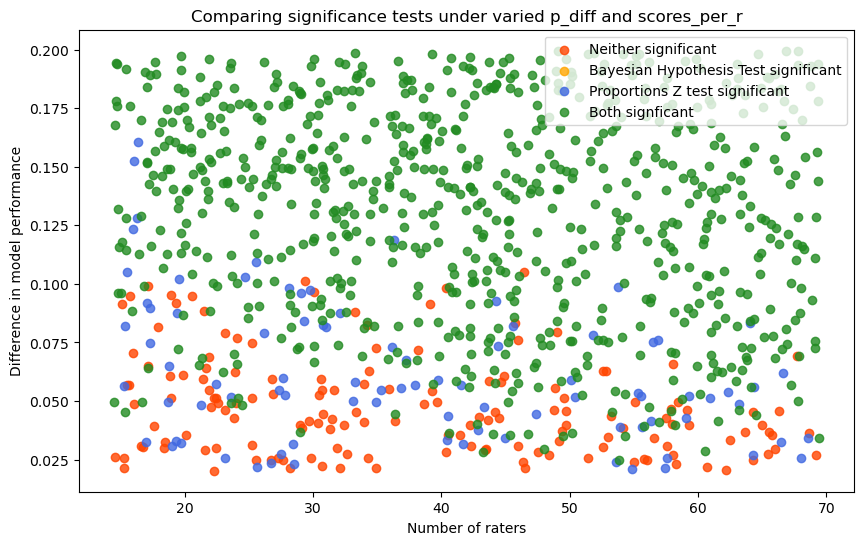

In [16]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(jitter(df["n_raters"]), df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparing significance tests under varied p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Number of raters")
ax.legend(loc="upper right")
plt.show()

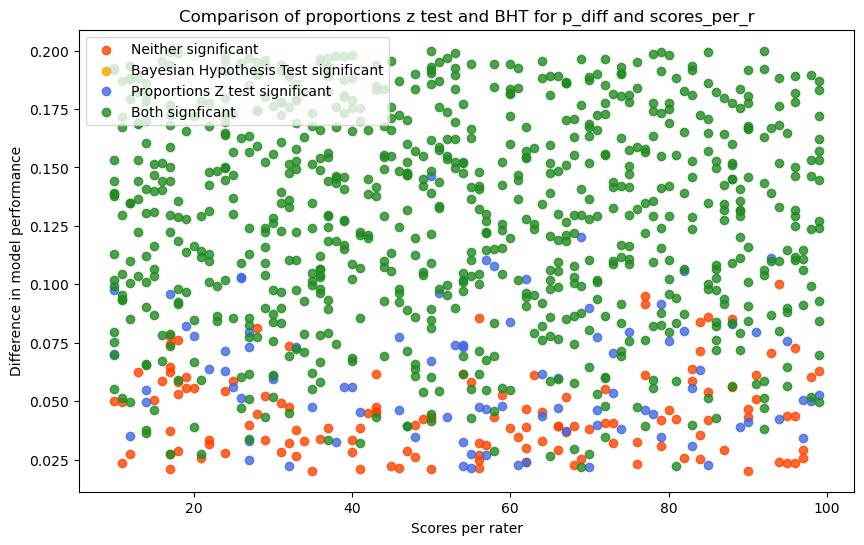

In [15]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_scores_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["scores_per_r"], df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT for p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Scores per rater")
ax.legend(loc="upper left")
plt.show()